<a href="https://colab.research.google.com/github/pavanreddy2307/FML/blob/main/EDA/ExploratoryDataAnylasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **All the Lifecycle in A Data Science Projects**
1. Data Anyalsis
2. Feature Engineering
3. Feature Selection
4. Model Bulding
5. Model Deployment


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [7]:
dataset=pd.read_csv('train.csv')

dataset.shape

(1460, 81)

In [8]:
dataset.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**In Data Anylasis We will Analyze To Find out the bellow stuff**
1. Missing Values
2. All the Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cadinality of the Categorical Variables
6. Outliers
7. Relationship between Independent and Dependent Variables

# **Missing Values**

In [9]:
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for i in features_with_na:
  print(i,np.round(dataset[i].isnull().mean(),4),'% are missing Values')

LotFrontage 0.1774 % are missing Values
Alley 0.9377 % are missing Values
MasVnrType 0.0055 % are missing Values
MasVnrArea 0.0055 % are missing Values
BsmtQual 0.0253 % are missing Values
BsmtCond 0.0253 % are missing Values
BsmtExposure 0.026 % are missing Values
BsmtFinType1 0.0253 % are missing Values
BsmtFinType2 0.026 % are missing Values
FireplaceQu 0.4726 % are missing Values
GarageType 0.0555 % are missing Values
GarageYrBlt 0.0555 % are missing Values
GarageFinish 0.0555 % are missing Values
GarageQual 0.0555 % are missing Values
GarageCond 0.0555 % are missing Values
PoolQC 0.9952 % are missing Values
Fence 0.8075 % are missing Values
MiscFeature 0.963 % are missing Values


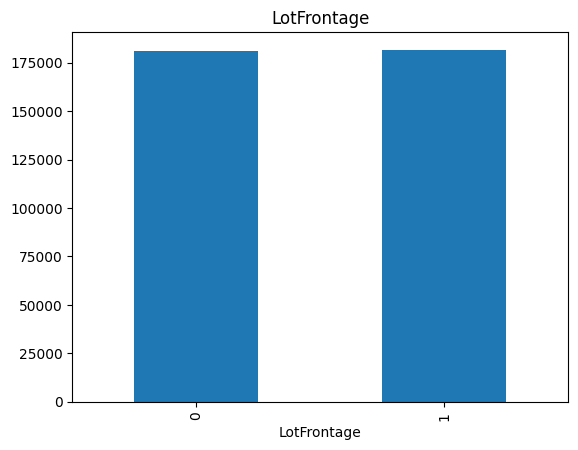

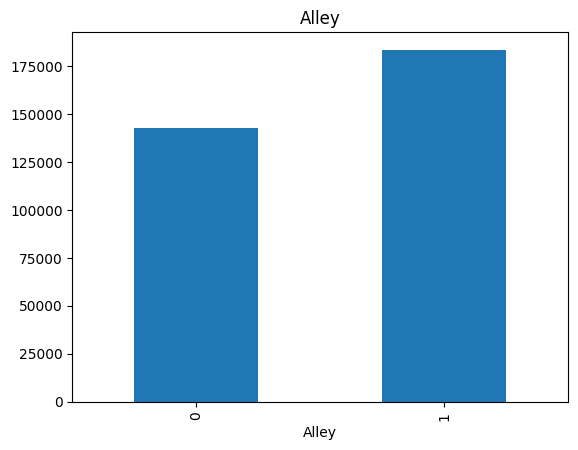

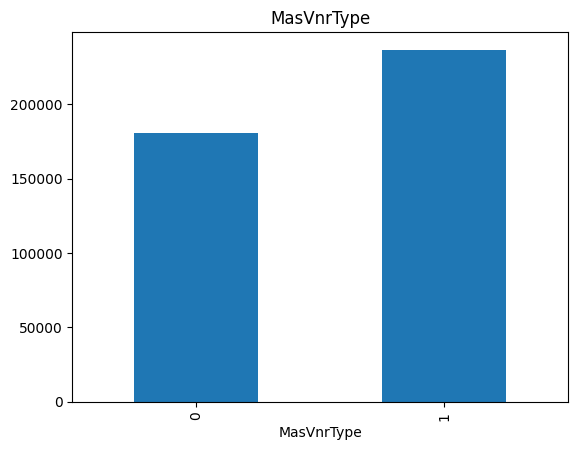

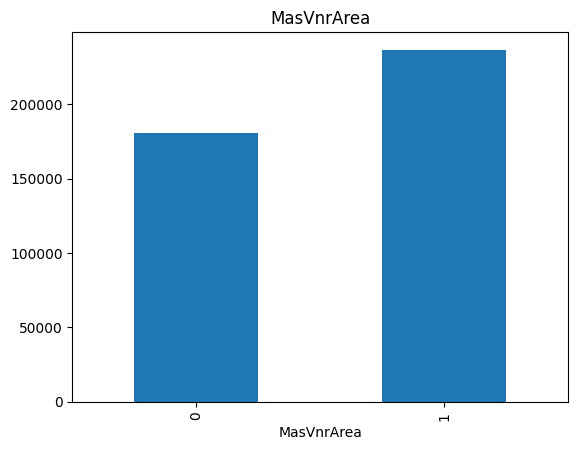

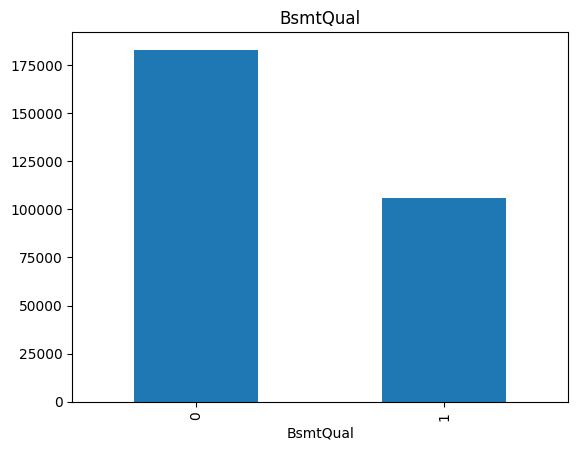

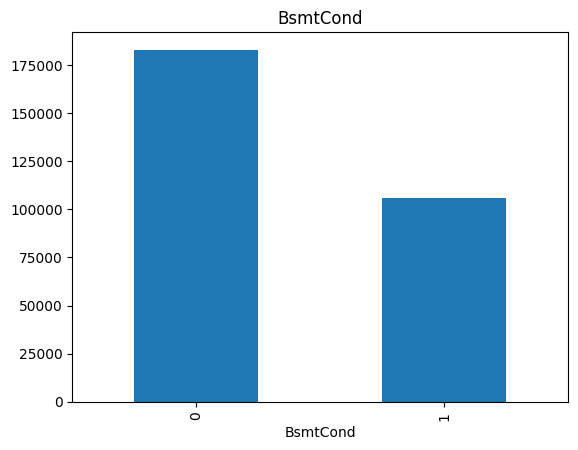

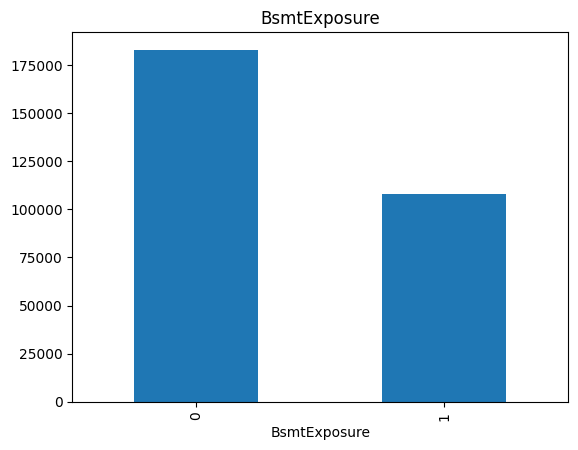

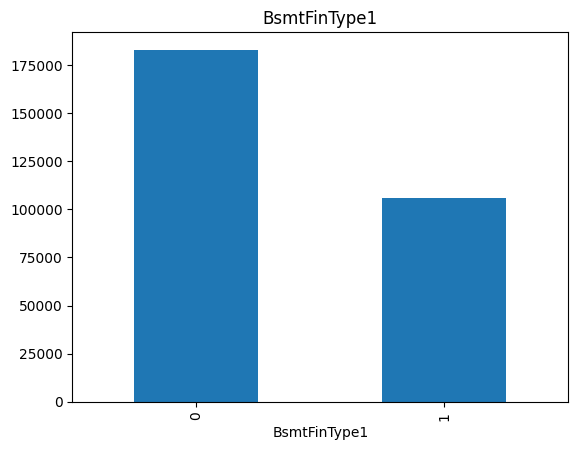

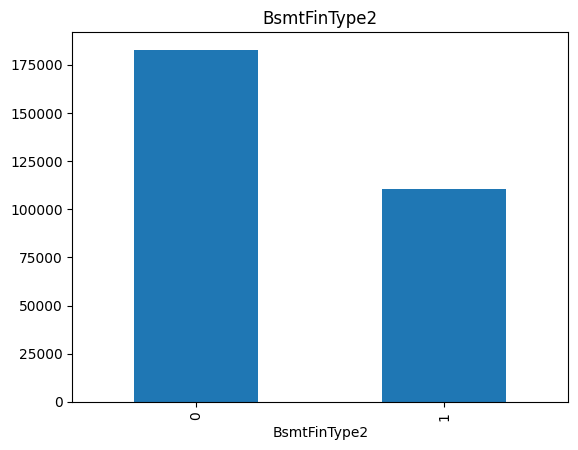

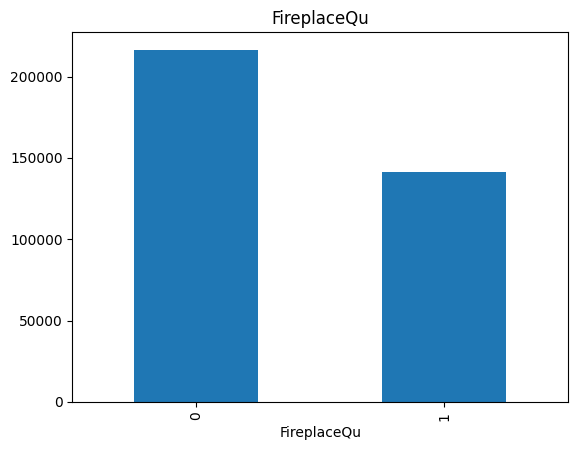

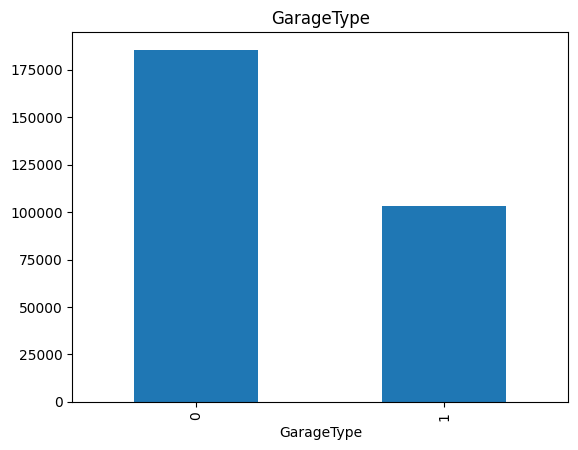

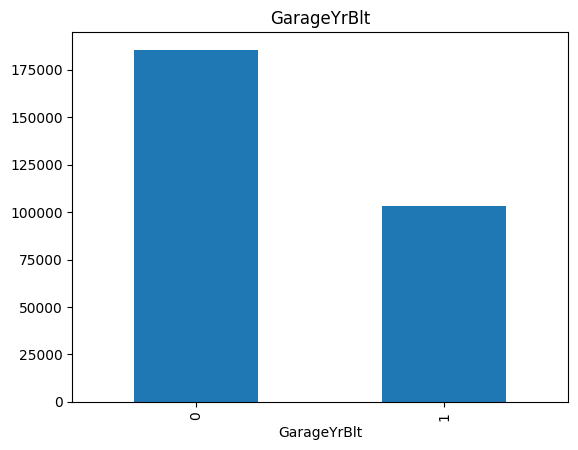

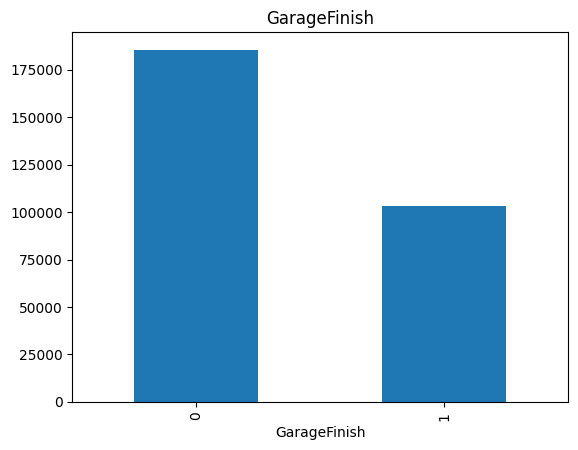

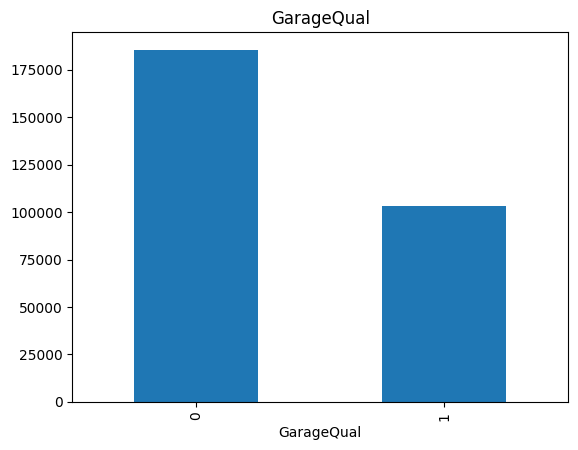

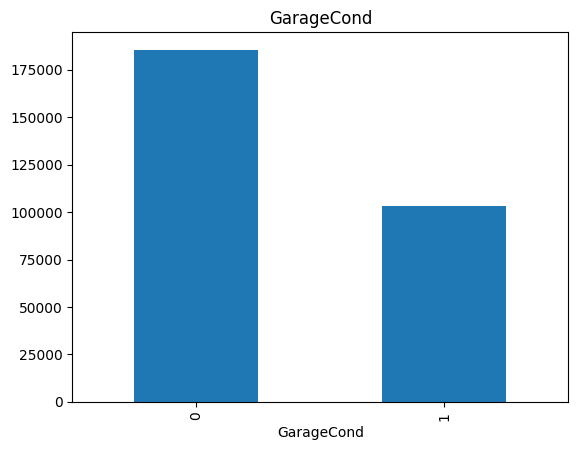

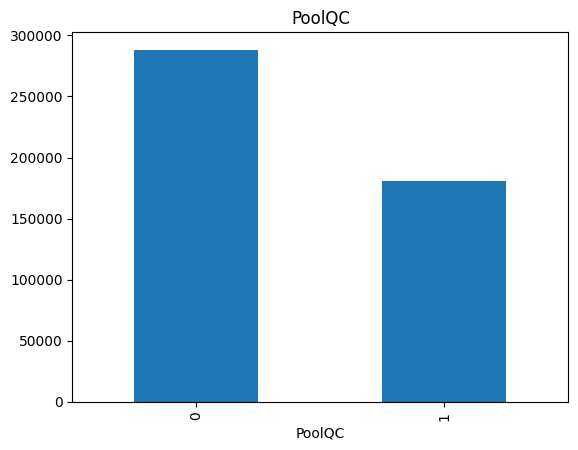

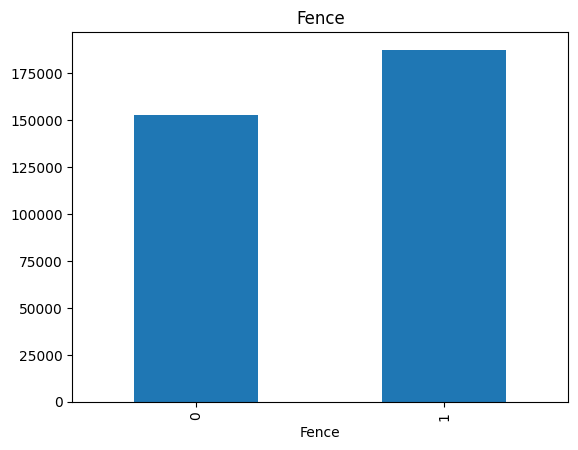

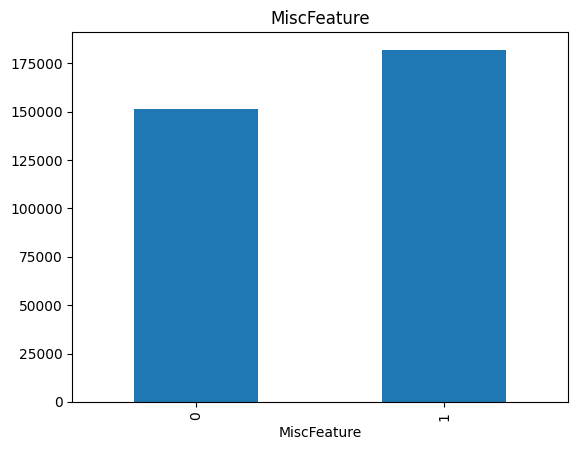

In [10]:
for feature in features_with_na:
  data=dataset.copy()

  data[feature]=np.where(data[feature].isnull(),1,0)

  data.groupby(feature)['SalePrice'].mean().plot.bar()
  plt.title(feature)
  plt.show()

Here with the relation between the missign values and the dependent variables is clearly visible So We need to replace these nan values with something meaningful when we will do the feature engineering section


# **Numerical Variables**

In [11]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

len(numerical_features)

38

**Temporal Variables(Eg: Datetime Variables)**

From the  Dataset we have 4 year variables. We have to extract information from the datetime variables like no of years or no of days One example in this specific sceniario can be difference in years beween the year the house was bulit and the year the house was sold. We will be performing this anaylsis in the feature Engineering

In [12]:
Temporal_features=[feature for feature in numerical_features if 'Yr'in feature or "Year" in feature]
Temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

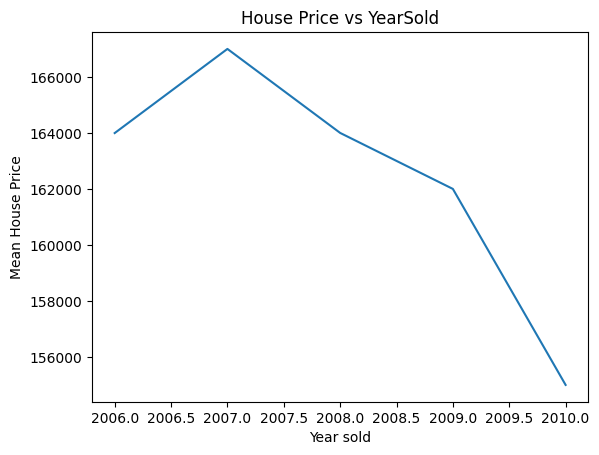

In [13]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year sold")
plt.ylabel('Mean House Price')
plt.title("House Price vs YearSold")

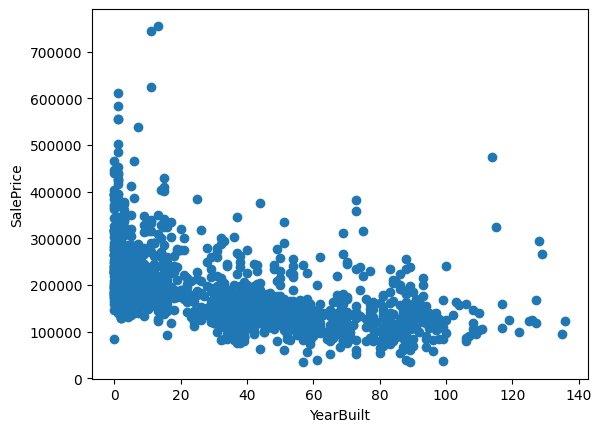

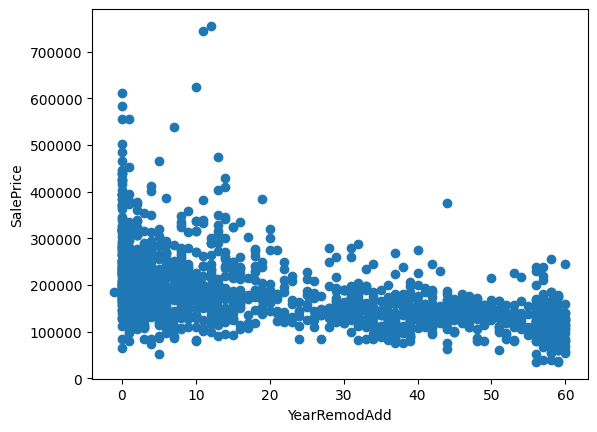

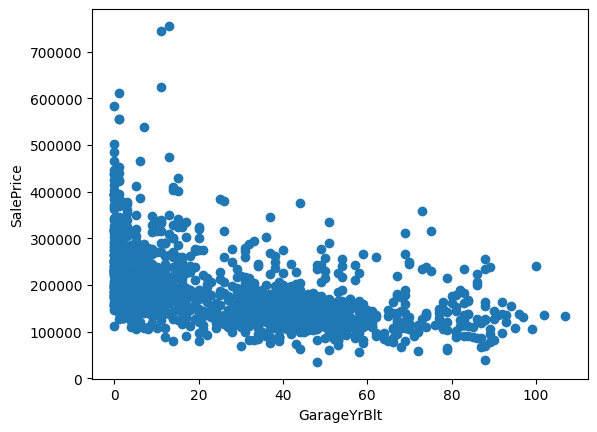

In [14]:
for feature in Temporal_features:
  if feature!='YrSold':
    data=dataset.copy()

    data[feature]=data["YrSold"]-data[feature]

    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [15]:
discreate_features=[i for i in numerical_features if len(dataset[i].unique())<25 and  i not in Temporal_features and i!='Id']
len(discreate_features)



17

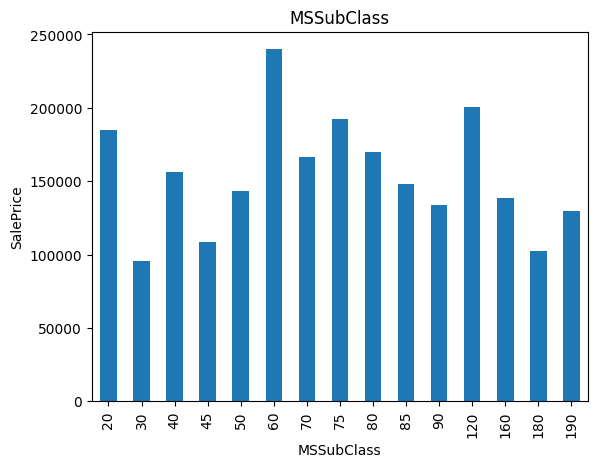

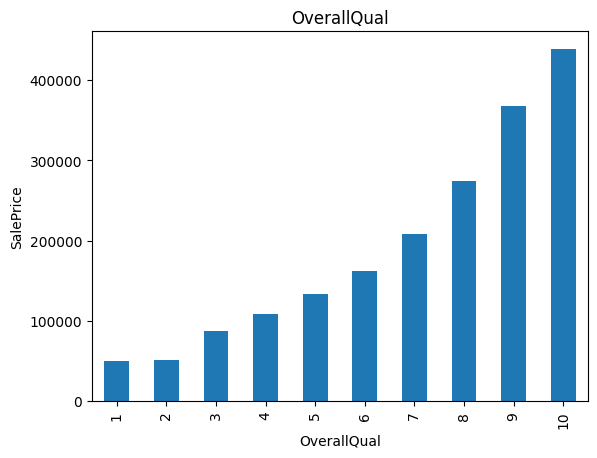

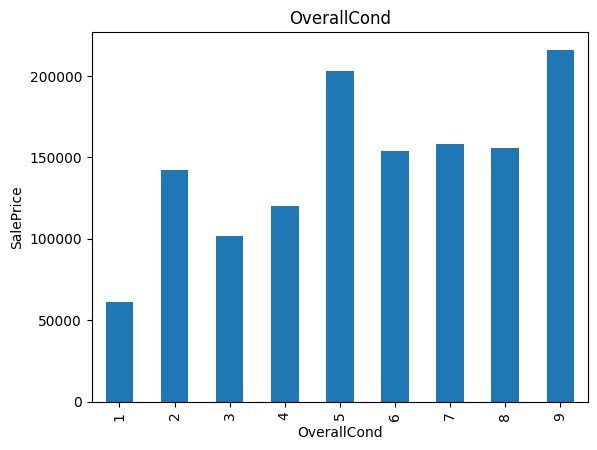

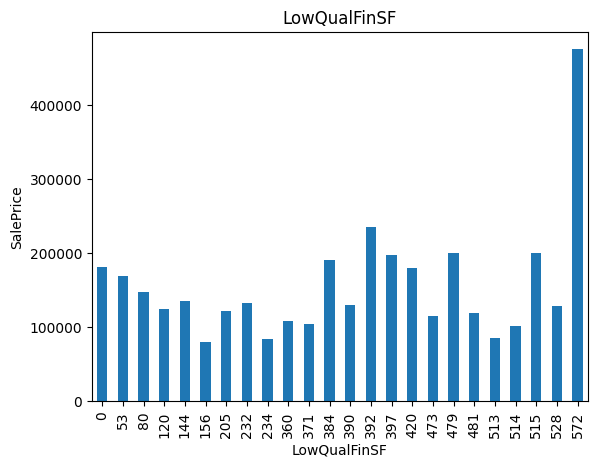

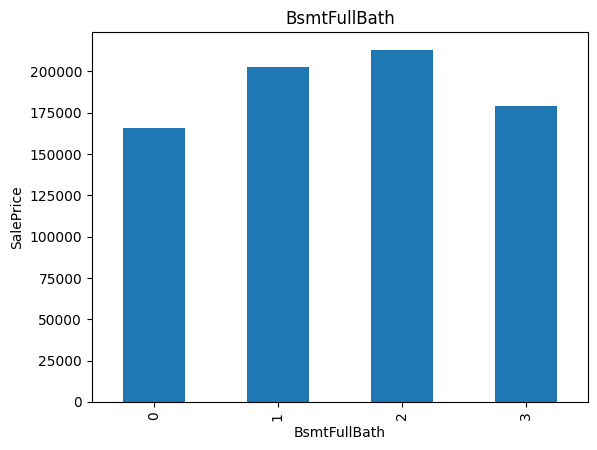

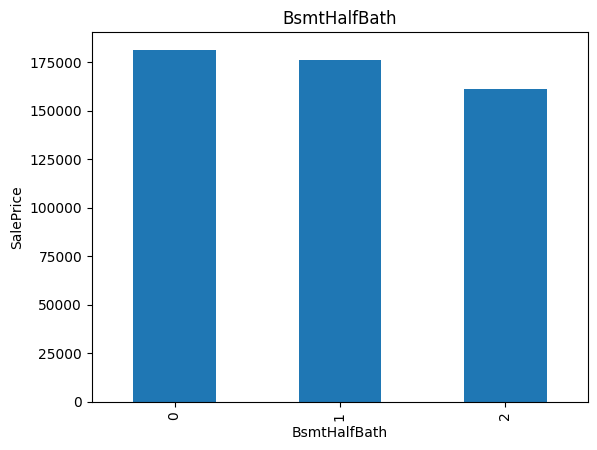

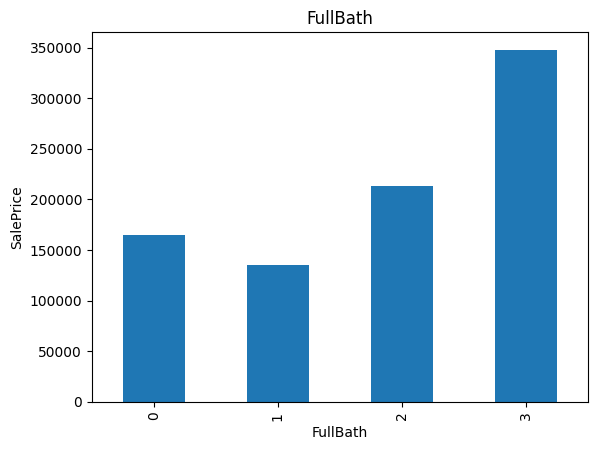

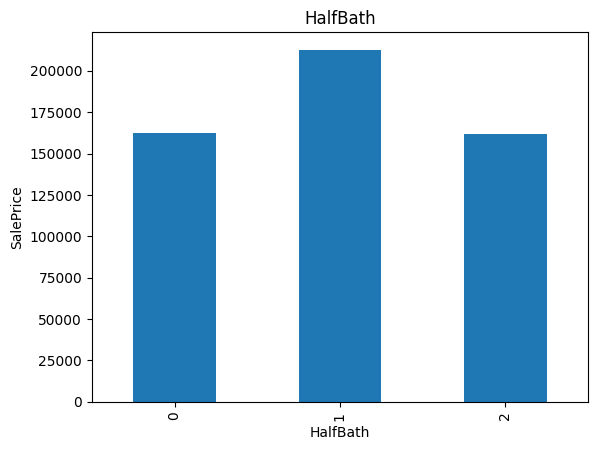

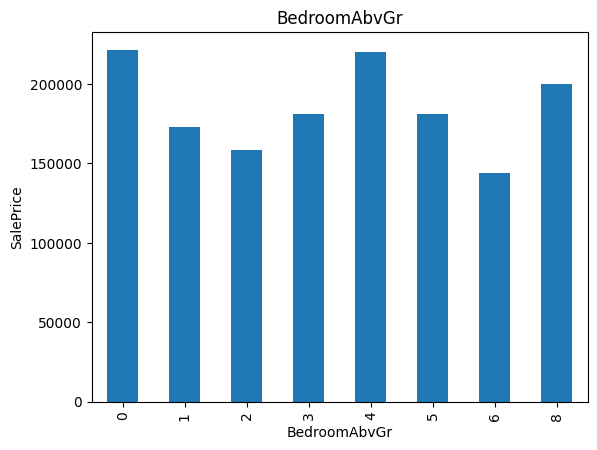

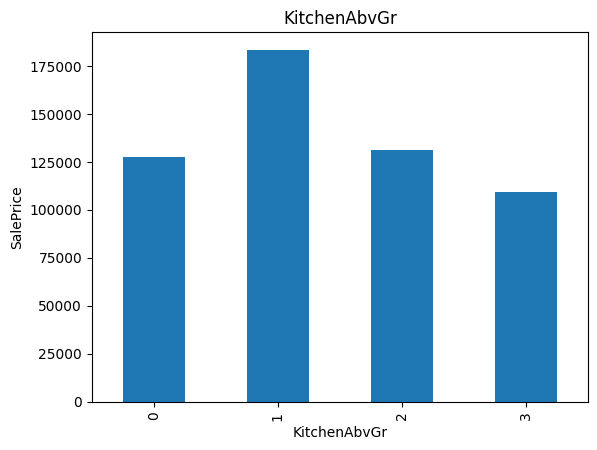

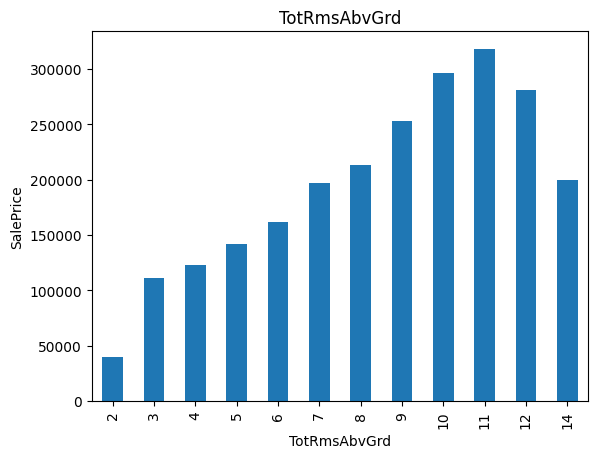

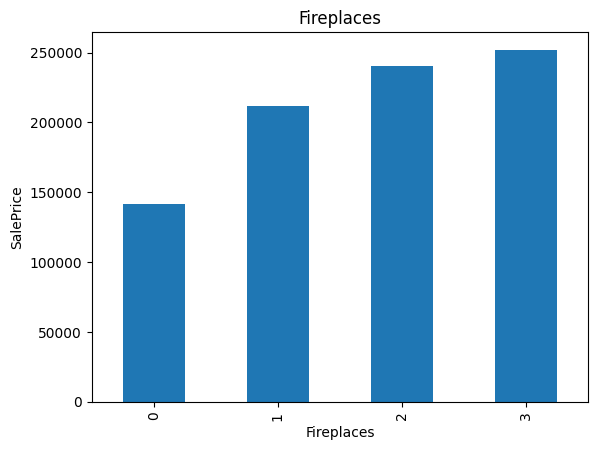

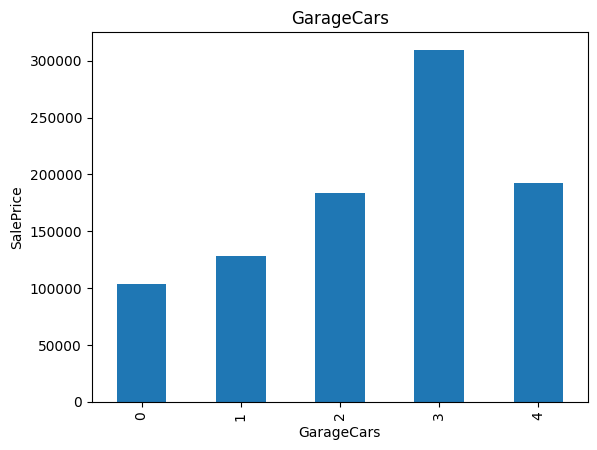

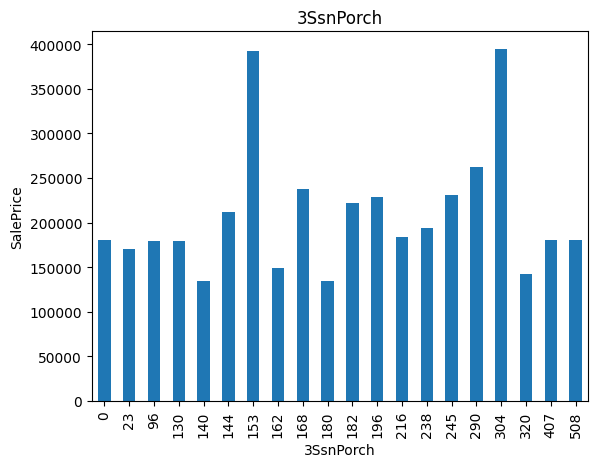

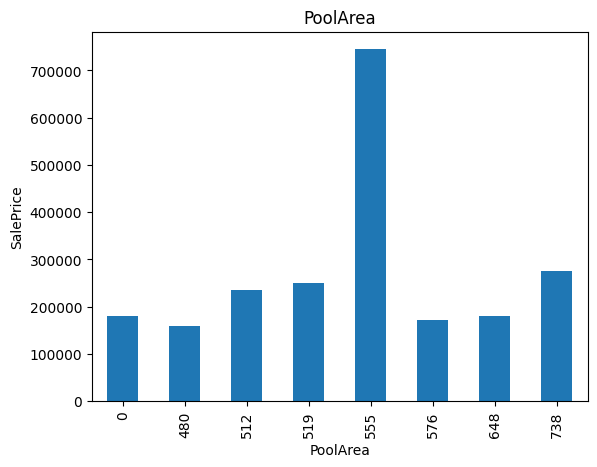

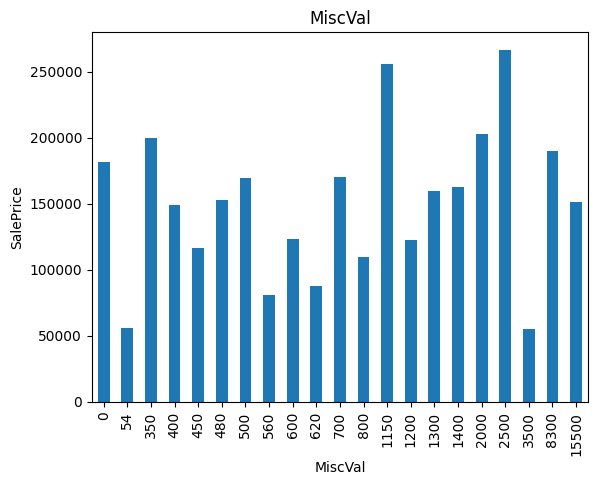

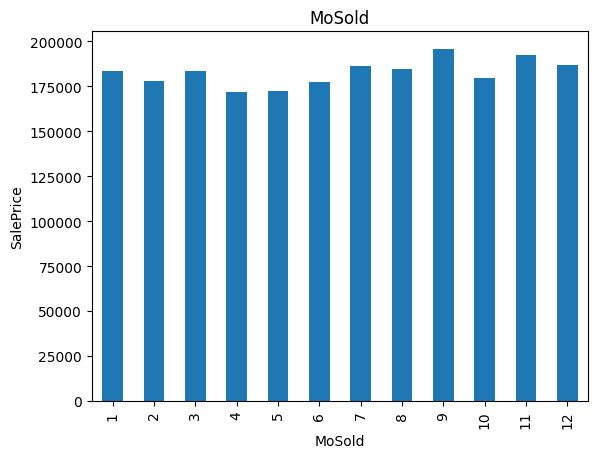

In [16]:
for feature in discreate_features:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [17]:
continous_feature=[i for i in numerical_features if i not in discreate_features and i not in Temporal_features and i!="Id"]
len(continous_feature)

16

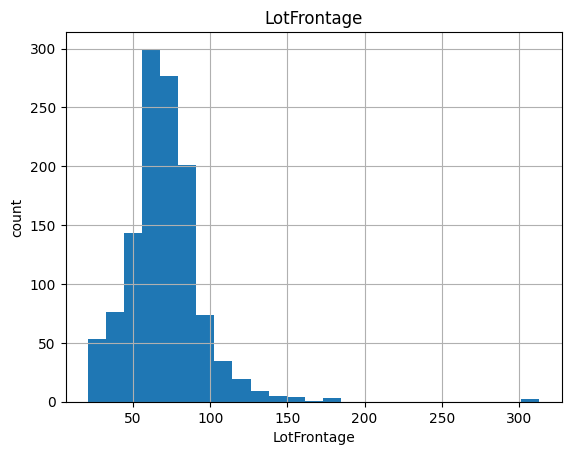

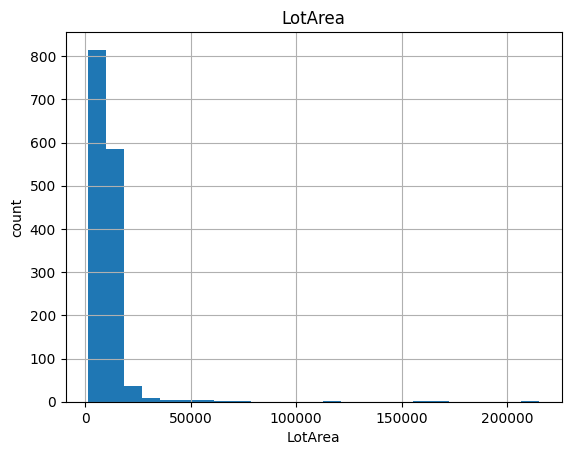

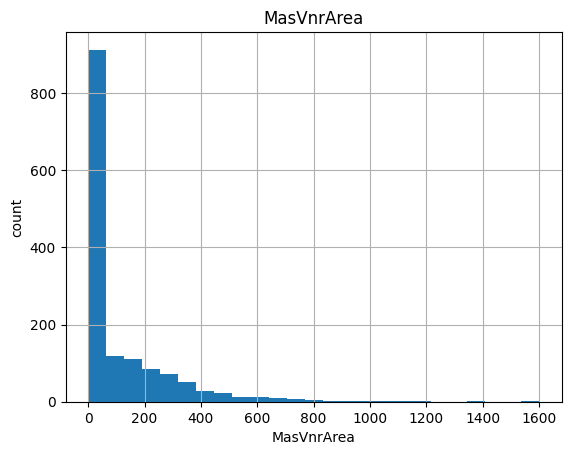

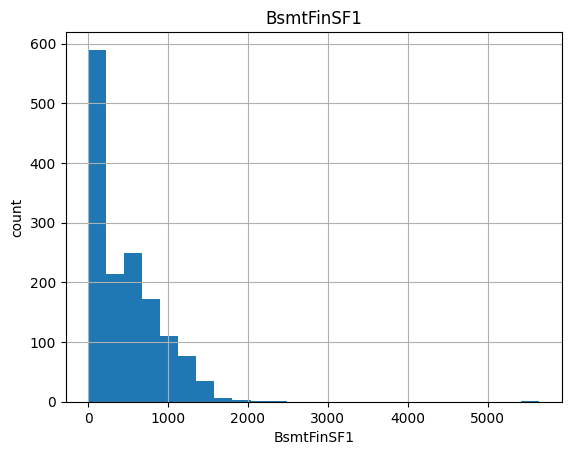

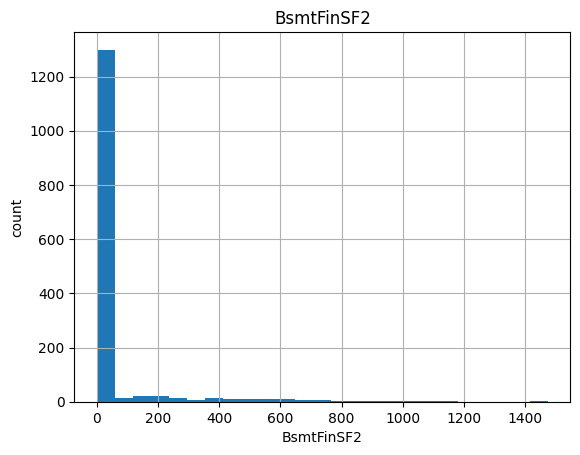

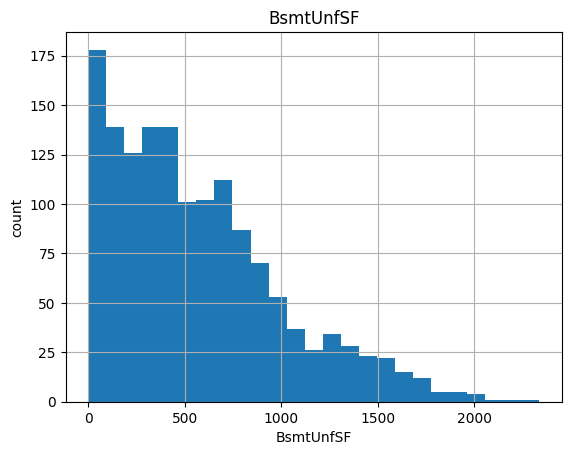

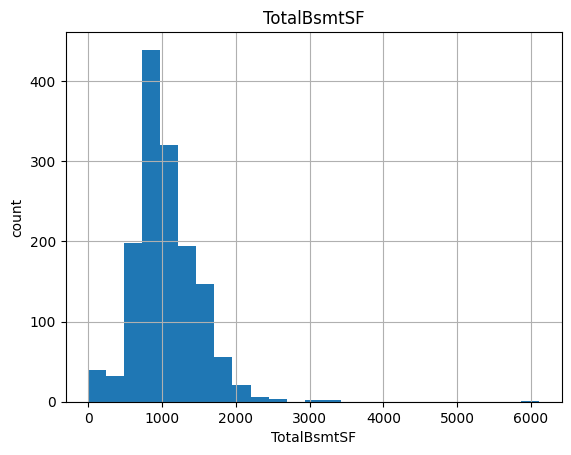

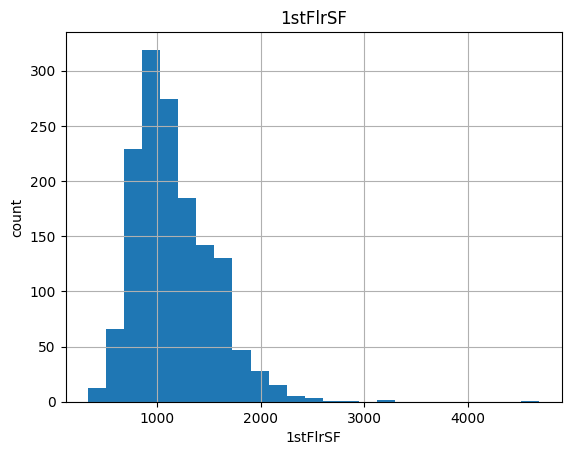

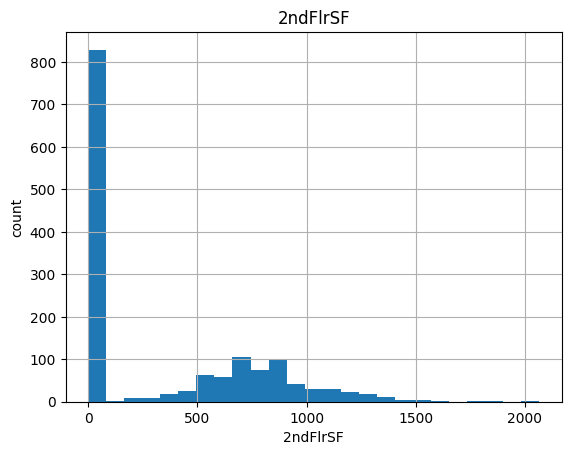

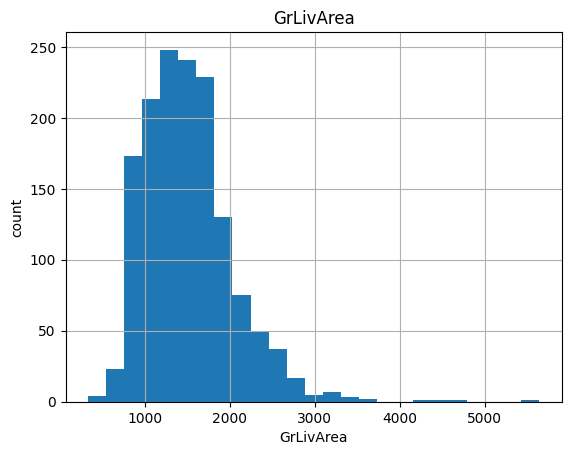

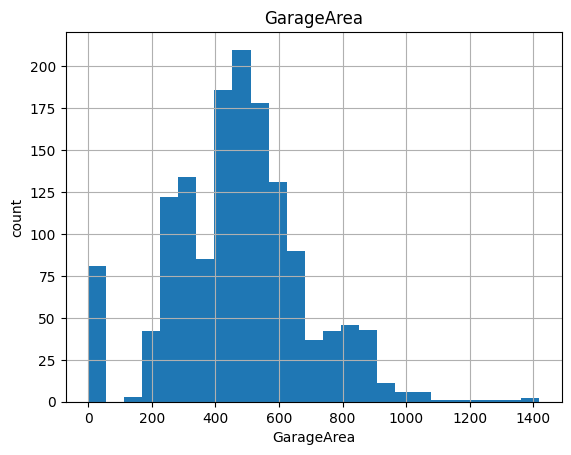

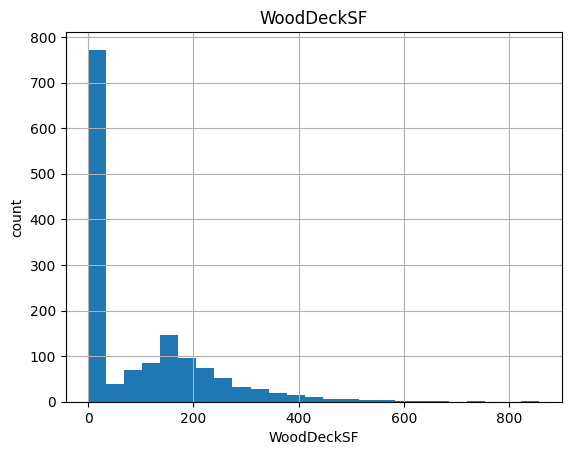

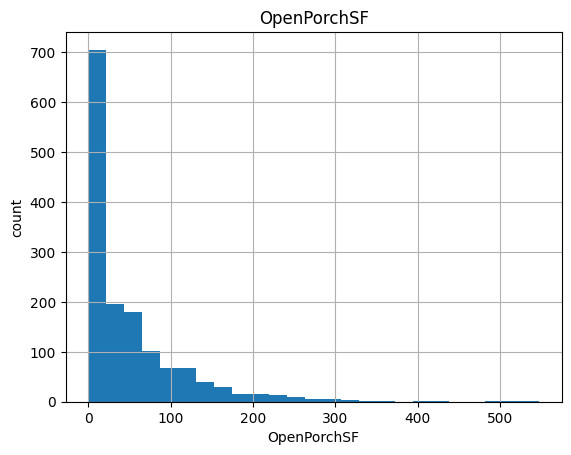

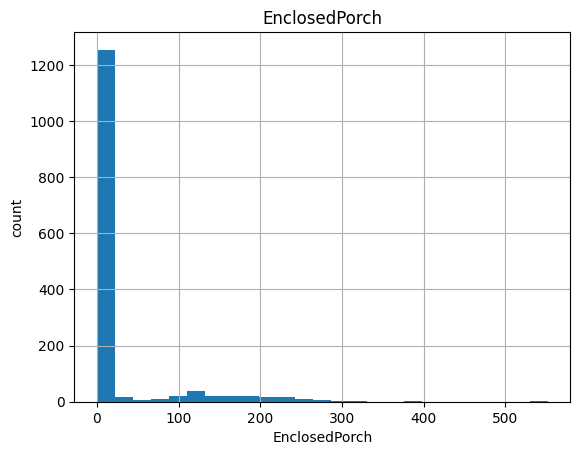

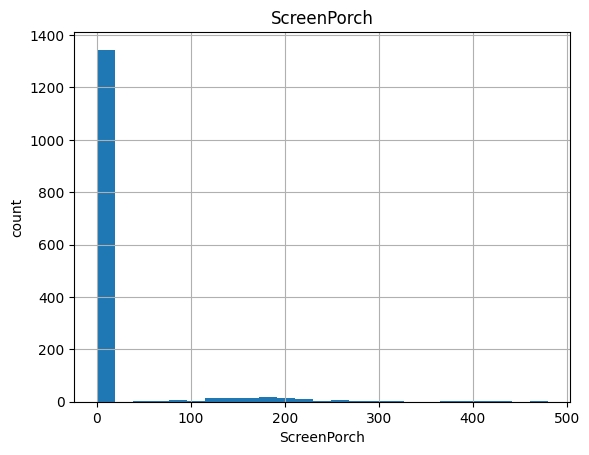

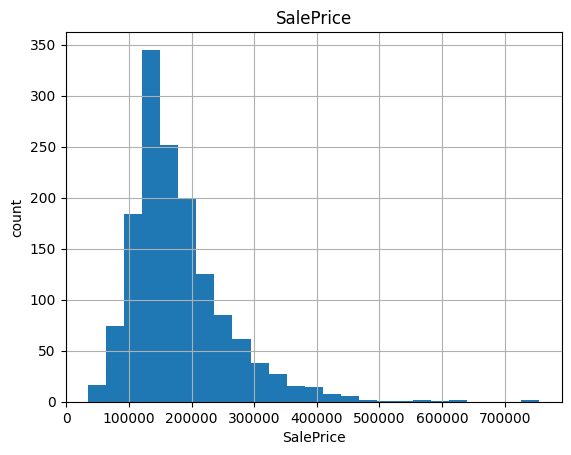

In [18]:
for feature in continous_feature:
  data=dataset.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

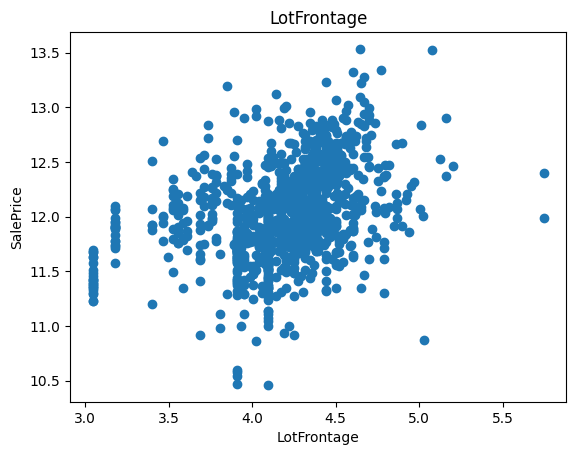

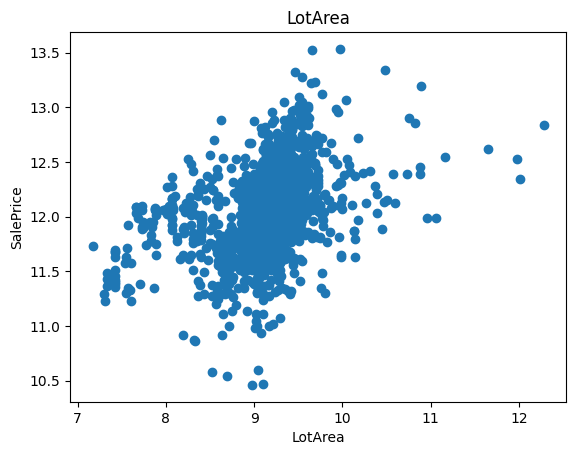

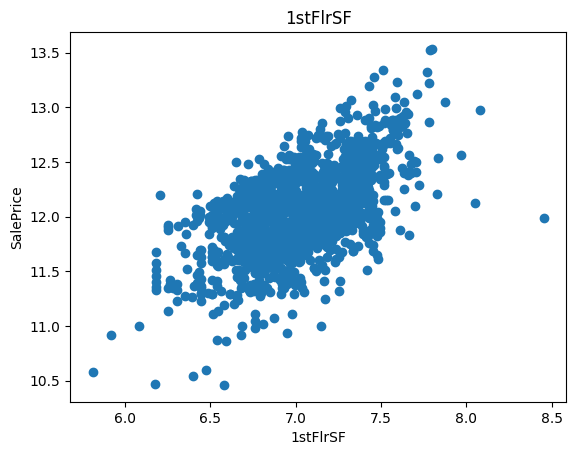

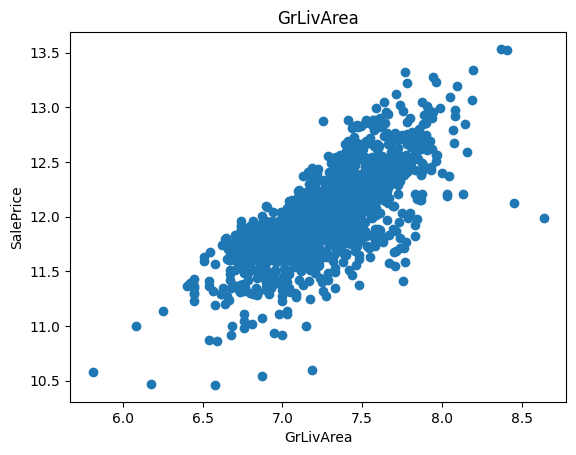

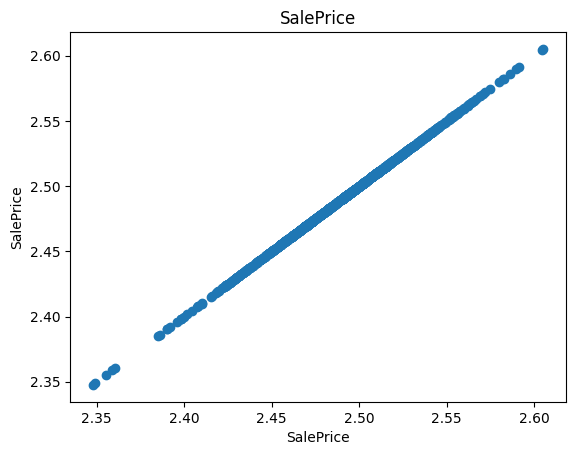

In [20]:
# @title # we will be using lograthmic transforamtion

for feature in continous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

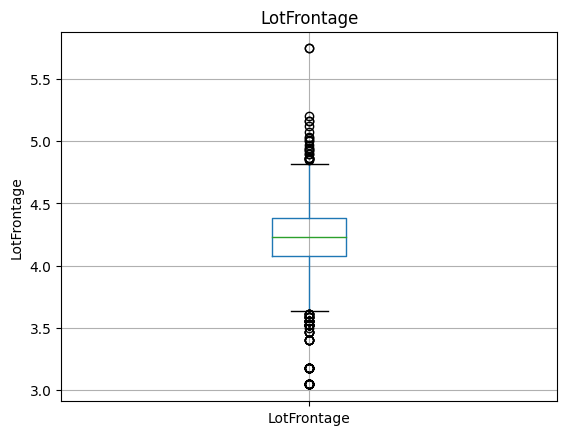

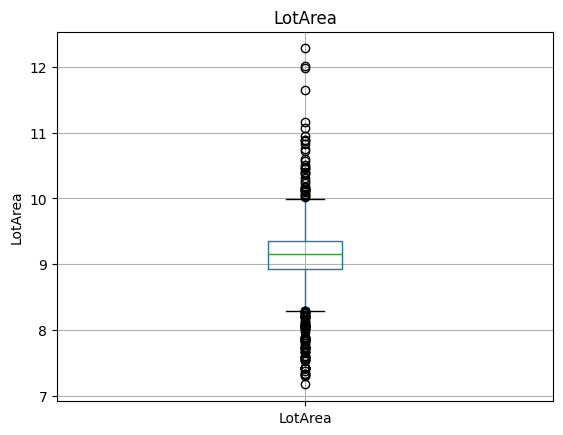

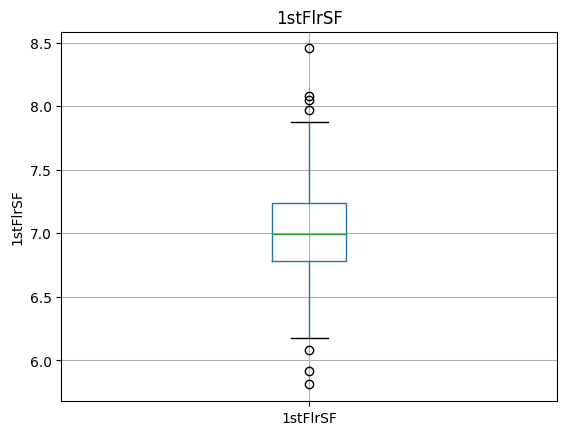

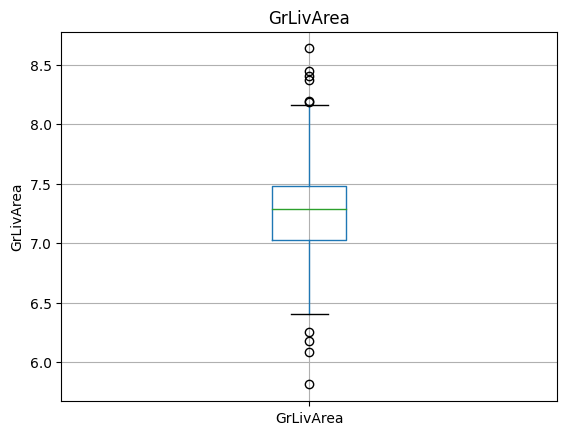

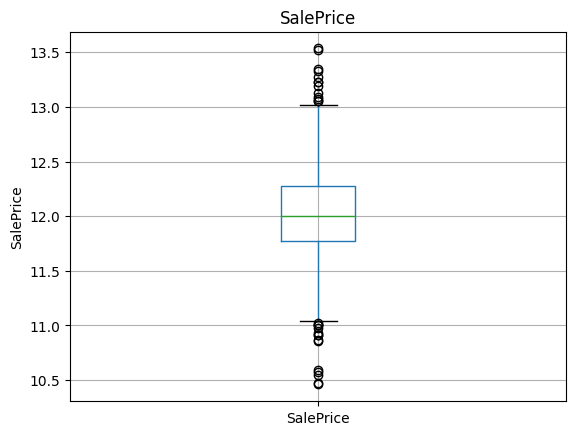

In [23]:
# @title ## **Outliers**
for feature in continous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():# as log(0) is undefined
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
# @title ### *categroical variables*

categroical_features=[i for i in dataset.columns if dataset[i].dtype=="O"]
len(categroical_features)